In [26]:
#Libraries for Data Manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt #For datetime

#Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv


In [27]:
bitcoin=pd.read_csv("/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
bitcoin.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#checking columns with missing data
bitcoin.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [29]:
#dropping null values 
bitcoin = bitcoin.dropna()

In [30]:
#Changing timestamp into date
bitcoin['Timestamp'] = pd.to_datetime(bitcoin['Timestamp'],unit='s')
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [31]:
#statistics of the bitcoin
bitcoin.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3613769.0,6009.023680,8996.247351,3.8,443.860000,3596.970000,8627.270000,6.176356e+04
High,3613769.0,6013.357082,9003.521006,3.8,444.000000,3598.190000,8632.980000,6.178183e+04
Low,3613769.0,6004.488004,8988.778319,1.5,443.520000,3595.620000,8621.090000,6.167355e+04
Close,3613769.0,6009.013545,8996.359688,1.5,443.860000,3597.000000,8627.160000,6.178180e+04
Volume_(BTC),3613769.0,9.323249,30.549891,0.0,0.409776,1.979811,7.278216,5.853852e+03
Volume_(Currency),3613769.0,41762.842397,151824.783901,0.0,452.142195,3810.124143,25698.211176,1.390067e+07
Weighted_Price,3613769.0,6008.934800,8995.991643,3.8,443.830622,3596.804145,8627.636614,6.171621e+04


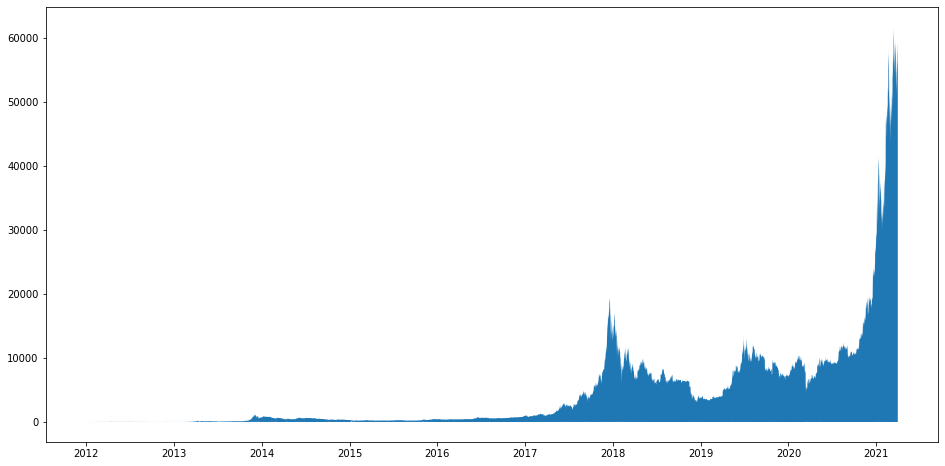

In [32]:
#volume(quantity)-weight(average) of bitcoin
plt.figure(figsize=(16,8))
plt.fill_between(bitcoin['Timestamp'], bitcoin['Volume_(BTC)'],bitcoin['Weighted_Price'])
plt.show()

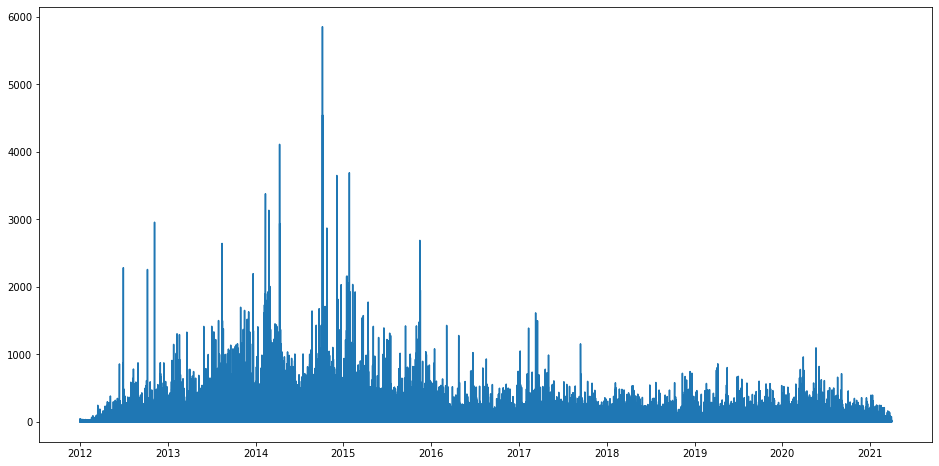

In [33]:
#plotting trading Volume of Bitcoin
plt.figure(figsize=(16,8))
plt.plot(bitcoin['Timestamp'], bitcoin['Volume_(BTC)'])

In [34]:
#Creating a dataset in which we will be forecasting with timestamp and closing price
close_price= bitcoin[['Timestamp', 'Close']].copy()
close_price=close_price.set_index('Timestamp')

close_price = close_price.groupby('Timestamp').sum()
close_price = close_price.asfreq('D')
close_price.head()

,Close
Timestamp,
2011-12-31 07:52:00,4.39
2012-01-01 07:52:00,NaN
2012-01-02 07:52:00,NaN
2012-01-03 07:52:00,NaN
2012-01-04 07:52:00,NaN


<AxesSubplot:xlabel='Timestamp'>

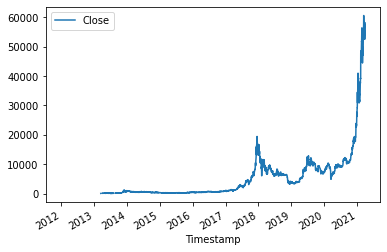

In [35]:
#plotting the graph
close_price.plot()